## 2023年度 航空宇宙情報システム学第三（矢入担当分）
## システム推定論入門 　補助資料


# <center> 第1回 序論 </center>

## <center> * システム推定論とは </center>
## <center> * 確率統計の復習 </center>

### <center>2023年10月3日</center>

このノートブックは補助資料です。授業スライドがメインですので詳細はそちらを参照してください。


## 行列指数関数(復習)

**(注)** 行列指数関数については、Sセメスター「情報システム学第二」の3回目くらいの授業で取り上げたので、詳細はそちらを参照してください。

正方行列 $\boldsymbol{A}$ の行列指数関数 $e^\boldsymbol{A}$は、次式の級数で定義されます。

$$
e^\boldsymbol{A} = \sum_{k=0}^{\infty} \frac{1}{k!} \boldsymbol{A}^k
= \boldsymbol{I} + \boldsymbol{A} + \frac{1}{2!} \boldsymbol{A}^2 + \cdots + \frac{1}{k!} \boldsymbol{A}^k + \cdots
$$

例として、
$$
\boldsymbol{A} = \left[ \begin{matrix} 1 & 2 \\ 3 & 4
\end{matrix}\right]
$$
のときの$e^\boldsymbol{A}$を第$n$項までの級数和として計算してみましょう。
下のコードでは、$k=10,20,\cdots,100$ のときの級数和を出力しています。


In [ ]:
import numpy as np
A = np.array([[1.0,2.0],[3.0,4.0]])
B = np.eye(2)
S = B.copy()
for k in range(1,101):
  B = np.dot(B,A)/k
  S += B
  if k % 10 == 0:
    print("k={}".format(k))
    print(S)

k=10
[[ 50.84773121  73.10246087]
 [109.6536913  160.50142251]]
k=20
[[ 51.96894293  74.73654523]
 [112.10481784 164.07376077]]
k=30
[[ 51.9689562   74.73656457]
 [112.10484685 164.07380305]]
k=40
[[ 51.9689562   74.73656457]
 [112.10484685 164.07380305]]
k=50
[[ 51.9689562   74.73656457]
 [112.10484685 164.07380305]]
k=60
[[ 51.9689562   74.73656457]
 [112.10484685 164.07380305]]
k=70
[[ 51.9689562   74.73656457]
 [112.10484685 164.07380305]]
k=80
[[ 51.9689562   74.73656457]
 [112.10484685 164.07380305]]
k=90
[[ 51.9689562   74.73656457]
 [112.10484685 164.07380305]]
k=100
[[ 51.9689562   74.73656457]
 [112.10484685 164.07380305]]


$k=20$ 以降は各成分の値が変化していないので、$k=20$くらいで打ち切って近似して良さそうなことが分かります。

ついでなので、固有値と固有ベクトルを使う方法もやってみます。$\boldsymbol{A}$の固有値を$\lambda_1$,$\lambda_2$、対応する固有ベクトルを$\boldsymbol{v}_1$,$\boldsymbol{v}_2$とし、$\boldsymbol{\Lambda}=\mbox{diag}(\lambda_1,\lambda_2)$, $\boldsymbol{V}=[\boldsymbol{v}_1,\boldsymbol{v}_2]$とすると、

$$
\boldsymbol{A}\boldsymbol{V} = \boldsymbol{V} \boldsymbol{\Lambda}
= \boldsymbol{V} \left[ \begin{matrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{matrix} \right]
$$
右から$\boldsymbol{V}^{-1}$を掛けると、
$$
 \boldsymbol{A} = \boldsymbol{V} \boldsymbol{\Lambda} \boldsymbol{V}^{-1}
$$
これを使うと、
$$
e^\boldsymbol{A} = \sum_{k=0}^{\infty} \frac{1}{k!} \boldsymbol{A}^k
= \boldsymbol{V} e^\boldsymbol{\Lambda} \boldsymbol{V}^{-1}
= \boldsymbol{V} \left[ \begin{matrix} e^{\lambda_1} & 0 \\ 0 & e^{\lambda_2} \end{matrix} \right] \boldsymbol{V}^{-1}
$$
として、（理屈上は）近似無しで求まります。

In [ ]:
import numpy.linalg as la
lmd,V = la.eig(A)
print("eigenvalues (lambda):",lmd)
print("eigenvectors (V):\n",V)

eA = np.dot(np.dot(V,np.diag(np.exp(lmd))),la.inv(V))
# eA = la.solve(V.T,np.dot(V,np.diag(np.exp(lmd))).T).T
print("Exponential of A: \n",eA)


eigenvalues (lambda): [-0.37228132  5.37228132]
eigenvectors (V):
 [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]
Exponential of A: 
 [[ 51.9689562   74.73656457]
 [112.10484685 164.07380305]]


Scipy には、行列指数関数を求める関数`expm`が含まれているので、その結果とも比較してみましょう。

In [ ]:
import scipy.linalg as scla
print('expm:\n')
print(scla.expm(A))

expm:

[[ 51.9689562   74.73656457]
 [112.10484685 164.07380305]]


練習としては、自分で行列指数関数を実装することは意味がありますが、実用的な観点からは、この`scipy.expm`など実績のある実装を使うのが望ましいです。

## (参考・発展) `scipy.signal.lti` による連続時間システムから離散時間システムへの変換

SciPy には、線形時不変(LTI)システムを扱うのに便利なサブモジュールがあります。
その中に、その名も`cont2discrete`という関数があり、文字通り連続時間システムを離散時間システムに変換してくれます。

公式ドキュメントの例題（https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cont2discrete.html )
をやってみましょう。

もとの連続時間システムの状態空間モデル、
$$
\begin{align}
\dot{\boldsymbol{x}} &= \boldsymbol{A}\boldsymbol{x} + \boldsymbol{B}u \\
y &= \boldsymbol{C}\boldsymbol{x} + \boldsymbol{D}u \\
\end{align}
$$
の各システム行列は、
$$
\boldsymbol{A} = \left[\begin{matrix}  0 & 1 \\ -10 & -3
\end{matrix}\right] ,
\boldsymbol{B} = \left[\begin{matrix}  0 \\ 1
\end{matrix}\right] ,
\boldsymbol{C} = \left[\begin{matrix}  1 & 0
\end{matrix}\right] ,
D = \left[\begin{matrix}   0
\end{matrix}\right]
$$
となっています。以下では、システムへの入力$u$として**ステップ関数**を与えた場合の応答を、もとの連続時間システムおよび、それを離散時間に変換したシステムについて求めています。

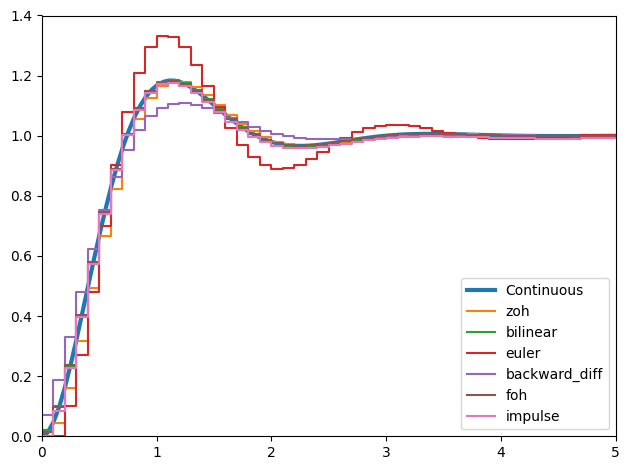

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import cont2discrete, lti, dlti, dstep

A = np.array([[0, 1],[-10., -3]])
B = np.array([[0],[10.]])
C = np.array([[1., 0]])
D = np.array([[0.]])
# 連続時間線形システムを構成
l_system = lti(A, B, C, D)
# ステップ応答を計算
t, x = l_system.step(T=np.linspace(0, 5, 100))
fig, ax = plt.subplots()
ax.plot(t, x, label='Continuous', linewidth=3)
# 時間刻み幅
dt = 0.1
for method in ['zoh', 'bilinear', 'euler', 'backward_diff', 'foh', 'impulse']:
   d_system = cont2discrete((A, B, C, D), dt, method=method)
   s, x_d = dstep(d_system)
   ax.step(s, np.squeeze(x_d), label=method, where='post')
ax.axis([t[0], t[-1], x[0], 1.4])
ax.legend(loc='best')
fig.tight_layout()

授業スライドで紹介した 0次ホールド (zoh) による変換が精度よく連続時間システムを近似できていることが分かります。

ステップ応答だけではなく、任意の波形の入力$u$を与えてシミュレートすることも可能です。

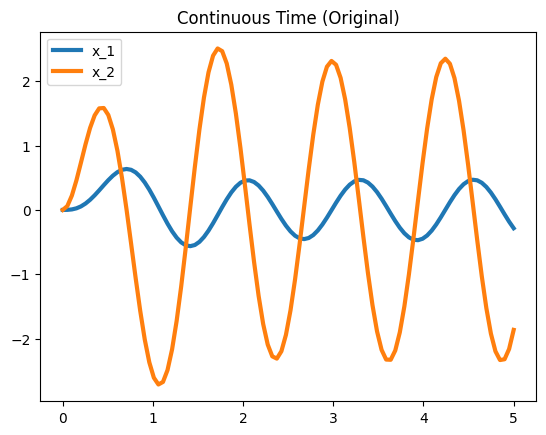

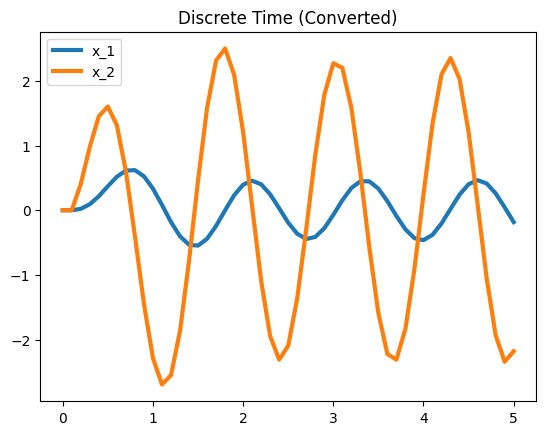

In [ ]:
from scipy.signal import lsim,dlsim
# sin波の入力を与えてみる
u = np.sin(5*t)
tc,yc,xc = lsim(l_system,u,t)
fig, ax = plt.subplots()
ax.plot(t, xc, label=['x_1','x_2'], linewidth=3)
ax.legend()
ax.set_title('Continuous Time (Original)')
plt.show()

# 離散時間システム(0次ホールド)
d_system = cont2discrete((A, B, C, D), dt, method='zoh')
td,yd,xd = dlsim(d_system,u,t)
fig, ax = plt.subplots()
ax.plot(td, xd, label=['x_1','x_2'], linewidth=3)
ax.legend()
ax.set_title('Discrete Time (Converted)')
plt.show()


順番が前後してしまいましたが、
ちなみに、離散時間システムのシステム行列、$\boldsymbol{A}^\prime$, $\boldsymbol{B}^\prime$, $\boldsymbol{C}^\prime$, $\boldsymbol{D}^\prime$ は、 `cont2disrete`の戻り値でタプルとして得られます。

In [ ]:
d_sys = cont2discrete((A,B,C,D),dt,method='zoh')
print("A'=\n",d_sys[0])
print("B'=\n",d_sys[1])
print("C'=\n",d_sys[2])
print("D'=\n",d_sys[3])

A'=
 [[ 0.95501541  0.08496335]
 [-0.8496335   0.70012536]]
B'=
 [[0.04498459]
 [0.8496335 ]]
C'=
 [[1. 0.]]
D'=
 [[0.]]


## 乱数を使ったシミュレーション

確率や統計の問題を解くときに、解析的に求めた答えが本当に正しいか不安なときがありますね。また、そもそも解析的な答えが求められない場合もあります。そんなときに便利なのが、乱数を使ったシミュレーションです。

`numpy.random` サブモジュールには、色々な確率分布に従って乱数を発生させる（サンプリングする）ことができます。

ごく基本的なものを紹介すると、
* `np.random.randint` : （指定された範囲の）整数列からランダムにサンプリング。
* `np.random.rand` : 範囲 $[0,1)$から一様分布に基づいて実数値をサンプリング。
* `np.random.randn` : 標準正規分布(Gauss分布)からサンプリング。

例えば、サイコロを10回振ったときの目を模擬したいときは、次のようにします。


In [ ]:
from numpy.random import randint,rand,randn

# サイコロを10回振ったときの目をシミュレート
randint(1,7,10)

array([6, 5, 6, 3, 6, 6, 2, 5, 2, 4])

### (例題) サイコロの目のシミュレート
「2つのサイコロを振ったときの目の値をそれぞれ確率変数$X$,$Y$で表すとする。$X^2+Y^2$ および $XY$の期待値を、乱数を用いて実験的に計算せよ。」

とりあえず、$n=1000$回、2つのサイコロを振り、$X^2+Y^2$と$XY$の平均を求めてみます。これは、NumPy array の要素演算を使うと簡単です。

In [ ]:
n = 1000
# 1000回ずつ2つのサイコロを振る
xlst = randint(1,7,n)
ylst = randint(1,7,n)
# X^2 + Y^2 の平均
print("Mean of X^2+Y^2:",np.mean(xlst**2+ylst**2))
# XY の平均
print("Mean of XY:",np.mean(xlst*ylst))


Mean of X^2+Y^2: 30.037
Mean of XY: 12.104


### サイコロの各目が出る回数をシミュレートした場合

これに関連して、「$n$回振ったときに、各目の数がそれぞれ何回出るか」をシミュレートしたい場合があります。

例えば、$n=100$のとき、上の`randint`を使って正直にやろうとすると、少し面倒です。

In [ ]:
# 100回振る
numbers = randint(1,7,100)
# 1から6が何回出たかを数える
count = np.zeros(6,dtype='int')
for n in numbers:
  count[n-1] += 1
print(count)

[12 26 17 13 16 16]


実は、これは**サイコロの各目が出る確率が等しく$1/6$の場合の多項分布(Multinomial distribution)からのサンプリング**に他ならないので、`numpy.random.multinomial`を使って、もっと手っ取り早く求めることができます。

コインの表と裏のように2値のどちらかを取るような場合は、代わりに`binomial`関数を使っても良いです。

In [ ]:
from numpy.random import multinomial

#multinomial(100,[1/6]*6) # リストの反復を使った書き方
multinomial(100,np.ones(6)/6) # こちらの方が分かりやすいかも。

array([14, 13, 25, 11, 18, 19])

## 各目の確率が異なるサイコロのシミュレート

ここで、`multinomial`関数の第2引数に、各目が出る確率(1/6)を長さ6の配列で渡していることに注目します。この配列の中身を変えれば、「それぞれ異なる確率で発生する離散事象の発生回数」をシミュレートすることもできます。

例えば、**「各目がその数の大きさに比例した確率で出るようなサイコロを1000回振ったとき」**は、次のようにして求めることができます。

[ 39  99 133 190 234 305]


<BarContainer object of 6 artists>

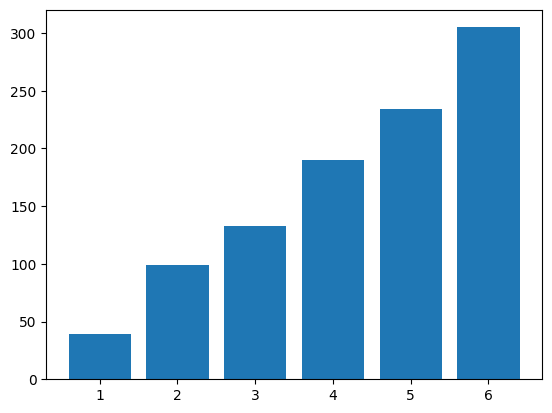

In [ ]:
p = np.arange(1,7)
p = p / np.sum(p)
cnt = multinomial(1000,p)
print(cnt)

# 棒グラフを書いてみる
plt.bar(range(1,7),cnt)

ここで話がもとに戻るのですが、「各目がその数の大きさに比例した確率で出るようなサイコロを100回振ったときの、**実際の目の数列**を求めたい。」ときはどうしたら良いでしょうか？

シミュレーションのプログラムを書いていると、意外に、これに似たことをやりたくなることが多いです。
例えば、当選確率が等しくない場合のくじ引きとか、この授業の最後で扱うパーティクルフィルタとかを実装しようとするときに必要です。
（数力演習の担当問題割り当てでも使いました。）

その割には、確率統計の歴史の中では軽視されていて、「カテゴリカル分布」「一般化ベルヌーイ分布」「マルチヌーイ分布」など、呼び方さえ一貫していません。。

Python (NumPy)の場合、おそらく一番簡単なのは、`random.choice` 関数を使うことだと思います。

In [ ]:
from numpy.random import choice
choice(range(1,7),100,p=p)

array([6, 3, 1, 3, 5, 6, 4, 6, 6, 6, 6, 4, 4, 3, 5, 6, 4, 3, 1, 4, 6, 4,
       6, 3, 6, 4, 6, 5, 5, 6, 2, 6, 3, 3, 4, 6, 2, 5, 5, 5, 1, 4, 5, 4,
       4, 5, 6, 3, 6, 3, 6, 6, 6, 4, 5, 2, 6, 4, 4, 6, 6, 1, 5, 4, 2, 4,
       5, 4, 3, 3, 6, 5, 4, 2, 5, 5, 5, 2, 5, 5, 4, 6, 2, 5, 2, 4, 6, 2,
       3, 1, 4, 3, 6, 5, 2, 5, 6, 3, 3, 1])

これと同じことを、一様分布からのサンプリング`np.random.rand`を使って実装することもできます（少し面白いので興味のある人は考えてみてください）が、結構面倒です。



### 簡単なモンテカルロ法

`np.random.rand`についても、少し遊んでみましょう。

$(0,0),(1,0),(1,1),(0,1)$を頂点とする正方形の内部（厳密にはx軸,y軸の真上になりえますが)にランダムに点を取ったときに、原点からの距離が1の円内に入る確率をシミュレーションで求め、理論値($\pi/4$)に近いものが得られるか確かめてみてください。


In [ ]:
pts = rand(1000,2) # 1000個の点をサンプリング
nin = 0
for i in range(1000):
  if np.sum(pts[i,:]**2) < 1.0 : # x^2+y^2 < 1
    nin += 1
print(nin/1000)

0.773


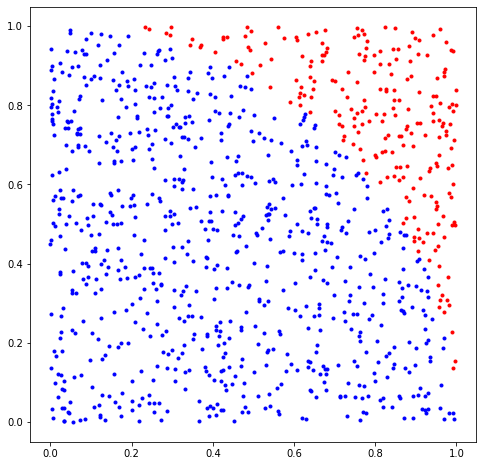

In [ ]:
# 視覚化してみる
# 各点の原点からの二乗距離距離
dist = np.sum(pts**2,axis=1)
plt.figure(figsize=(8,8))
plt.plot(pts[dist < 1,0],pts[dist < 1,1],'b.') # 単位円内の点をプロット
plt.plot(pts[dist >= 1,0],pts[dist >= 1,1],'r.')

`for`文のところは内包表記を使えば1行で書くこともできますが、わかりにくいので自粛します。

これはモンテカルロ法と呼ばれる手法の最も簡単な例でした。
モンテカルロ法（の発展版）を使うと、一様分布や正規分布などからの乱数発生器を使って、直接乱数をサンプリングすることが難しい確率分布 $p(x)$からの乱数発生が可能になります。

## 正規分布(ガウス分布)からのサンプリング

統計的推定においては、正規分布(ガウス分布)は特別な意味を持っています。それは、正規分布が様々な「嬉しい」性質を持っているので、世の中の現象や観測値（のノイズ）が正規分布に従うと仮定すると、とても都合が良いからです。

この授業の目標としている**カルマン(Kalman)フィルタ**の原理も、多変量正規分布（多変量ガウス分布）の性質が理解できれば、わりと簡単に導出することができます。

まず、(1変数の)正規分布に従う乱数をサンプリングしてみます。`randn`関数は、標準正規分布、すなわち、平均が0で標準偏差が1である正規分布(${\cal N}(0,1)$)からサンプリングすることができます。

In [ ]:
randn(10)

array([-0.18185913, -0.90010865,  0.19508107, -0.53654325, -1.08835436,
        1.81201581, -2.04873744, -0.70133416, -0.1005733 ,  1.1019683 ])

本当に、標準正規分布に従っているのか、数値を見ただけではわからないので、たくさん(10000個)のサンプルを発生させて、平均と標準偏差を求め、ヒストグラムも書いてみます。

Mean:-0.007596000189344265
Stdard deviation:0.9958112021863142


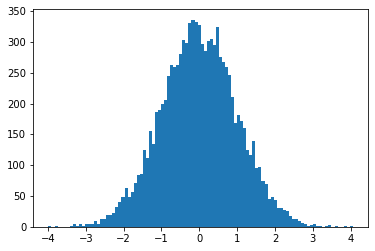

In [ ]:
x = randn(10000)
_ = plt.hist(x,bins=100) # 戻り値を非表示
print('Mean:{}'.format(np.mean(x)))
print('Stdard deviation:{}'.format(np.std(x)))

平均を$\mu$, 分散を$\sigma^2$とする一般の正規分布 ${\cal N}(\mu,\sigma^2)$からサンプリングするには、`np.random.normal`関数を使っても良いのですが、正規分布の基本性質を使って、`randn`で発生させた乱数を変換するのでも容易に求められます。

例えば、平均 $1.0$, 分散 $4.0$の正規分布からのサンプリングは、次のようになります。

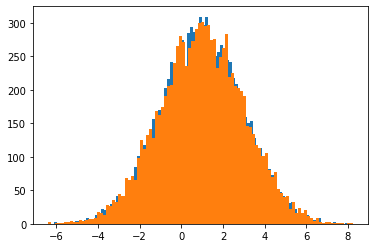

In [ ]:
from numpy.random import normal
# normal 関数を使う場合
x = normal(1,2.0,10000)
_ = plt.hist(x,bins=100) # 戻り値を非表示

# randn から得られたサンプルを変換する場合
x = 2.0*randn(10000) + 1.0
_ = plt.hist(x,bins=100) # 戻り値を非表示


スライド資料の【正規分布の性質２】

「2つの確率変数$X$と$Y$がそれぞれ正規分布 ${\cal N}(\mu_a,\sigma_a^2)$と${\cal N}(\mu_b,\sigma_b^2)$に従い、かつ、<font color="red">互いに独立</font>であるとき、$Z=X+Y$は、${\cal N}(\mu_a+\mu_b,\sigma_a^2+\sigma_b^2)$に従う。」も、試してみましょう。

Mean of z:9.978147657974493
Variance of z:12.747269689885057


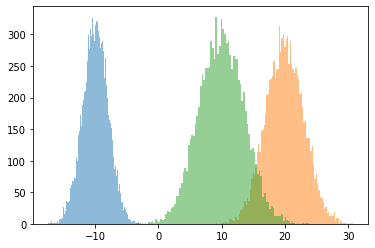

In [ ]:
# 平均-10, 分散4 に従う分布
x = normal(-10,2,10000)
# 平均20, 分散9に従う分布
y = normal(20,3,10000)
# z = x + y
z = x + y

_ = plt.hist(x,alpha=0.5,bins=100)
_ = plt.hist(y,alpha=0.5,bins=100)
_ = plt.hist(z,alpha=0.5,bins=100)

print('Mean of z:{}'.format(np.mean(z)))
print('Variance of z:{}'.format(np.var(z)))


$X$と$Y$が互いに独立でなくても、$Z=X+Y$は正規分布になりますが、その分散は単純和にはなりません。このことについては、次回に説明します。

## 中心極限定理

最後に、正規分布が「最も自然な」確率分布であることを示す事実の一つである中心極限定理についても、簡易実験してみましょう。

まず、**一様分布 ${\cal U}(0,1)$から取り出した1000個のサンプルの平均**を10000回求めてヒストグラムを書いてみます。

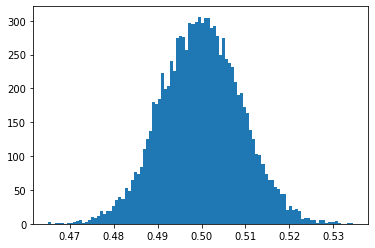

In [ ]:
x = []
for i in range(10000):
  x.append(np.mean(rand(1000)))
_=plt.hist(x,bins=100)

確かに、正規分布の形をしています。

次に、**サイコロを10回振ったときに1の目が出る回数の頻度**をプロットしてみると、これは多項分布に従うので、正規分布とは違う形をしています。

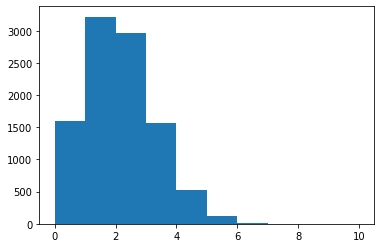

In [ ]:
_=plt.hist(multinomial(10,[1/6]*6,10000)[:,0],bins=range(11))

しかし、**さいころを10回振ったときに1が出る回数の「100回平均」**の頻度をプロットしてみると、、

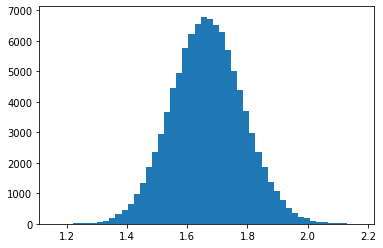

In [ ]:
_=plt.hist(np.mean(multinomial(10,[1/6]*6,(100,100000))[:,:,0],axis=0),bins=50)

のように、形が正規分布に近づくことが確かめられます。